In [1]:
# We need to install a wide variety of libraries. 
#For this we will install pandas, numpy, seaborn and matplotlib libraries.

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
iris_df = pd.read_csv('iris.csv')

In [3]:
#drop ID column since we dont need it for the analysis
iris_df.drop('Id', inplace=True, axis=1)

In [4]:
#check the first few rows of the dataset
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This helps us to understand each column. From this, we can say that;
1. the data frame contains 4 numerical variables and 1 categorical variable(Species).
2. there are no missing values in the data frame.

In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This gives overall statistical information of the dataset. This includes the mean, median, and other statistical properties of the numerical variables.

In [7]:
#renaming the columns
new_names = {'SepalLengthCm':'Sepal_Length', 'SepalWidthCm':'Sepal_Width', 'PetalLengthCm':'Petal_Length', 'PetalWidthCm':'Petal_Width'}

iris_df.rename(columns=new_names, inplace=True)

iris_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

The plot above shows that each species(Iris setosa, Iris versicolor and Iris virginica) has 50 as its count which means the data is well balanced.

<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

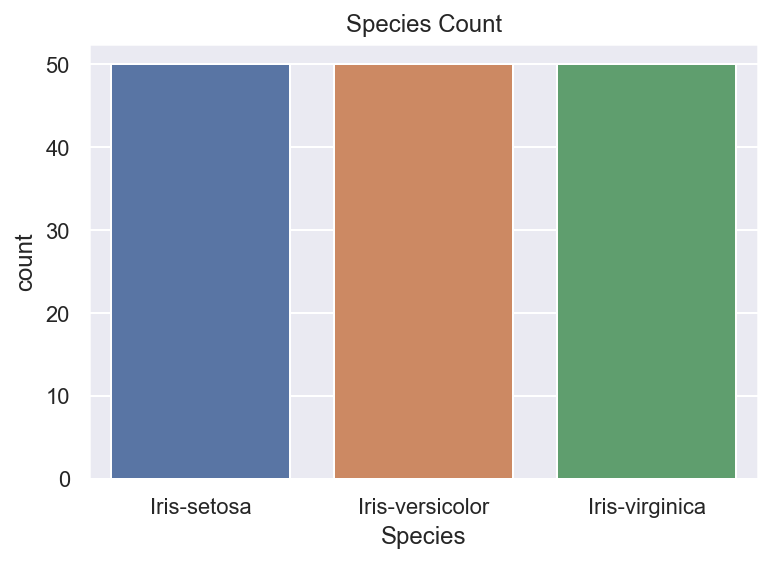

In [9]:
plt.title('Species Count')
sns.countplot(x=iris_df['Species'])

This shows the number of samples of each species of the Iris flower. Iris-setosa, Iris-versicolor, and Iris-virginica have 50 samples each.

<AxesSubplot:title={'center':'Comparison on various species based on Sepal length and width'}, xlabel='Sepal_Length', ylabel='Sepal_Width'>

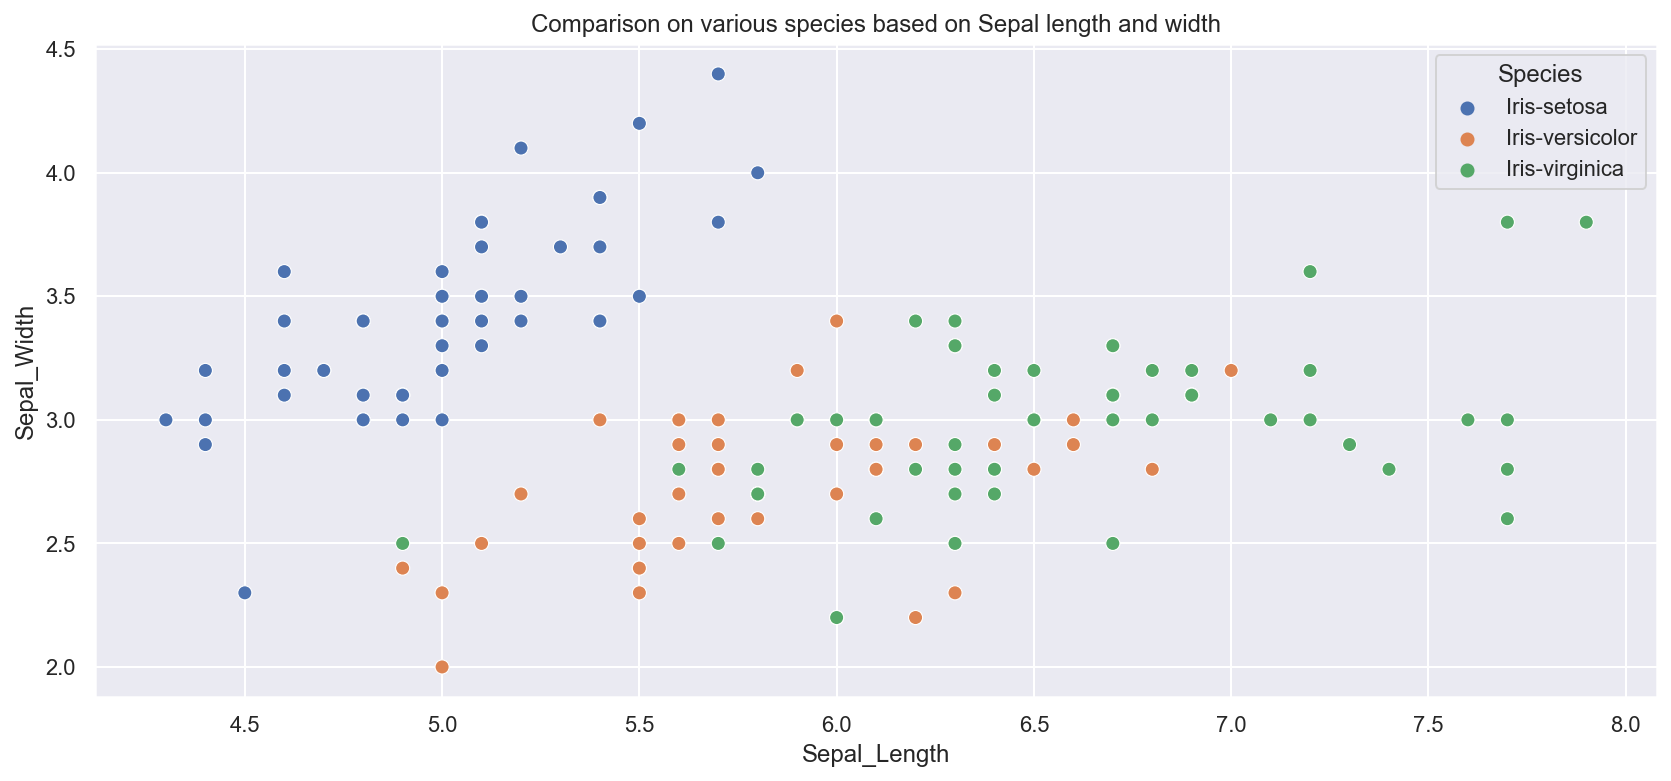

In [10]:
plt.figure(figsize=(14,6))

plt.title('Comparison on various species based on Sepal length and width')

sns.scatterplot(x=iris_df['Sepal_Length'], y=iris_df['Sepal_Width'], hue=iris_df['Species'], s=50)

From the plot above, we can say;
1. Iris-setosa species have smaller sepal lengths and higher sepal width.
2. Iris-versicolor species lies in the middle for both its sepal length and sepal width.
3. Iris-virginica species have higher sepal length and smaller sepal width.

<AxesSubplot:title={'center':'Comparison on various species based on Petal length and width'}, xlabel='Petal_Length', ylabel='Petal_Width'>

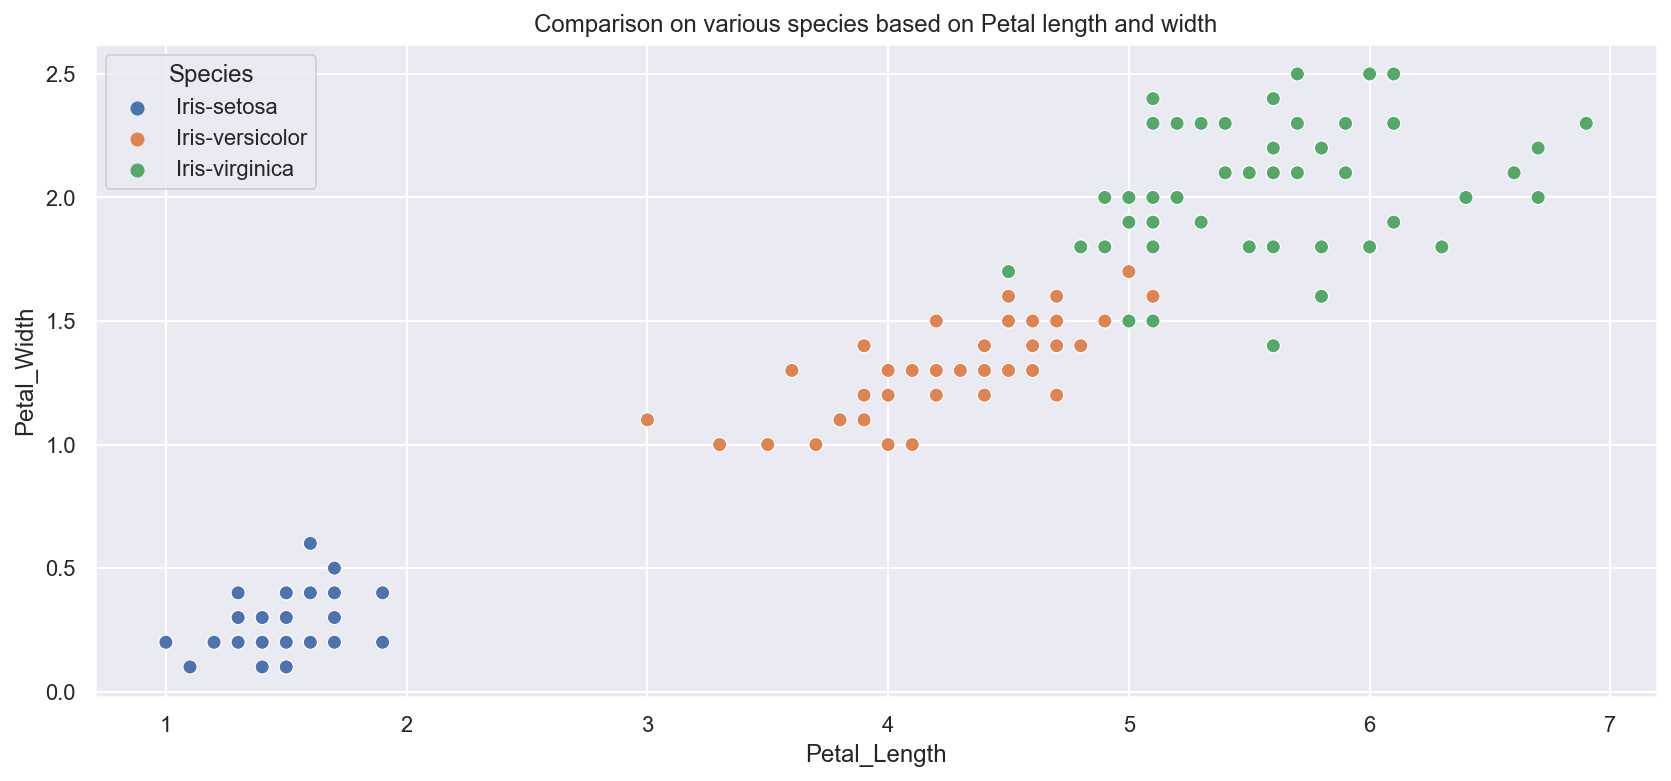

In [11]:
plt.figure(figsize=(14,6))

plt.title('Comparison on various species based on Petal length and width')

sns.scatterplot(x=iris_df['Petal_Length'], y=iris_df['Petal_Width'], hue=iris_df['Species'], s=50)

From the plot above, we can say;
1. Iris-setosa species have the smallest petal length and petal width.
2. Iris-versicolor species have average petal length and petal width.
3. Iris-virginica species have the highest petal length and petal width.

<AxesSubplot:>

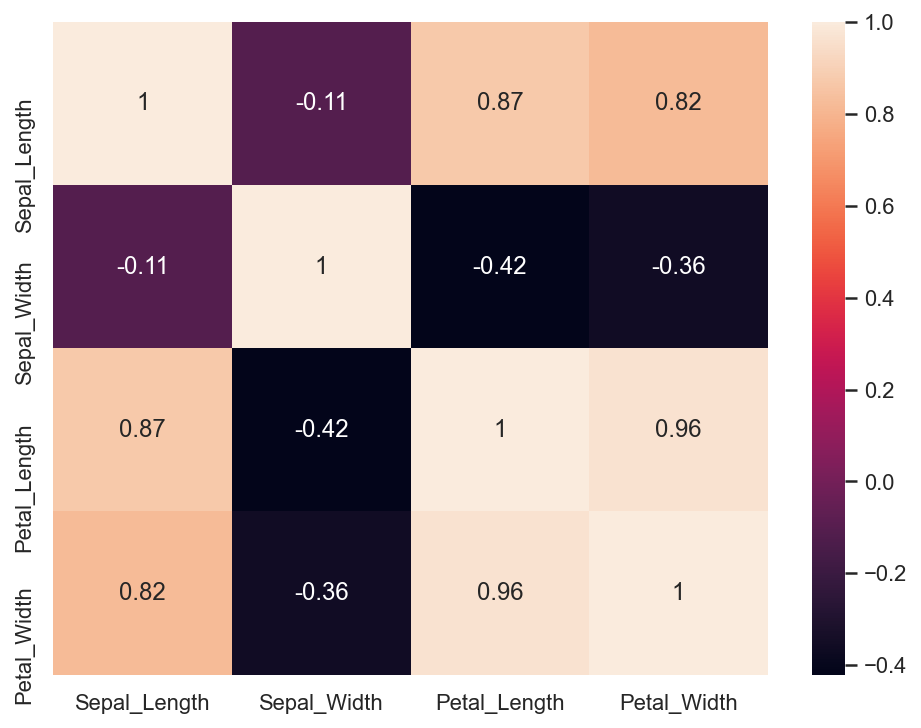

In [12]:
#to check for correlation between variables
plt.figure(figsize=(8,6))
iris_corr = iris_df.corr()
sns.heatmap(iris_corr, annot=True)


The plot above is a correlation matrix. It helps us gain a better understanding of the correlation between the variables in the dataset.
From the plot, we see that the petal length and petal width are highly correlated, as well as the Petal width and sepal length have a good correlation.

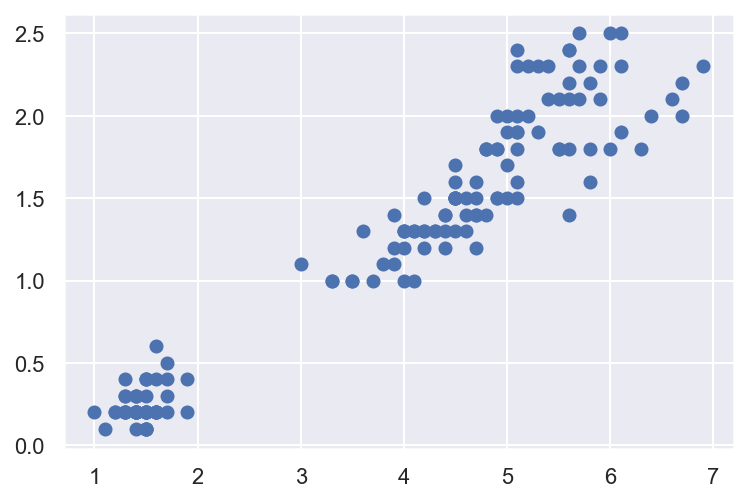

In [13]:
plt.scatter(iris_df['Petal_Length'], iris_df['Petal_Width']);

In [14]:
#check the mean and median values of each species

iris_df.groupby('Species').agg(['mean', 'median'])

Sepal_Length        Sepal_Width        Petal_Length         \
                        mean median        mean median         mean median   
Species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                Petal_Width         
                       mean median  
Species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

<AxesSubplot:xlabel='Species', ylabel='Sepal_Width'>

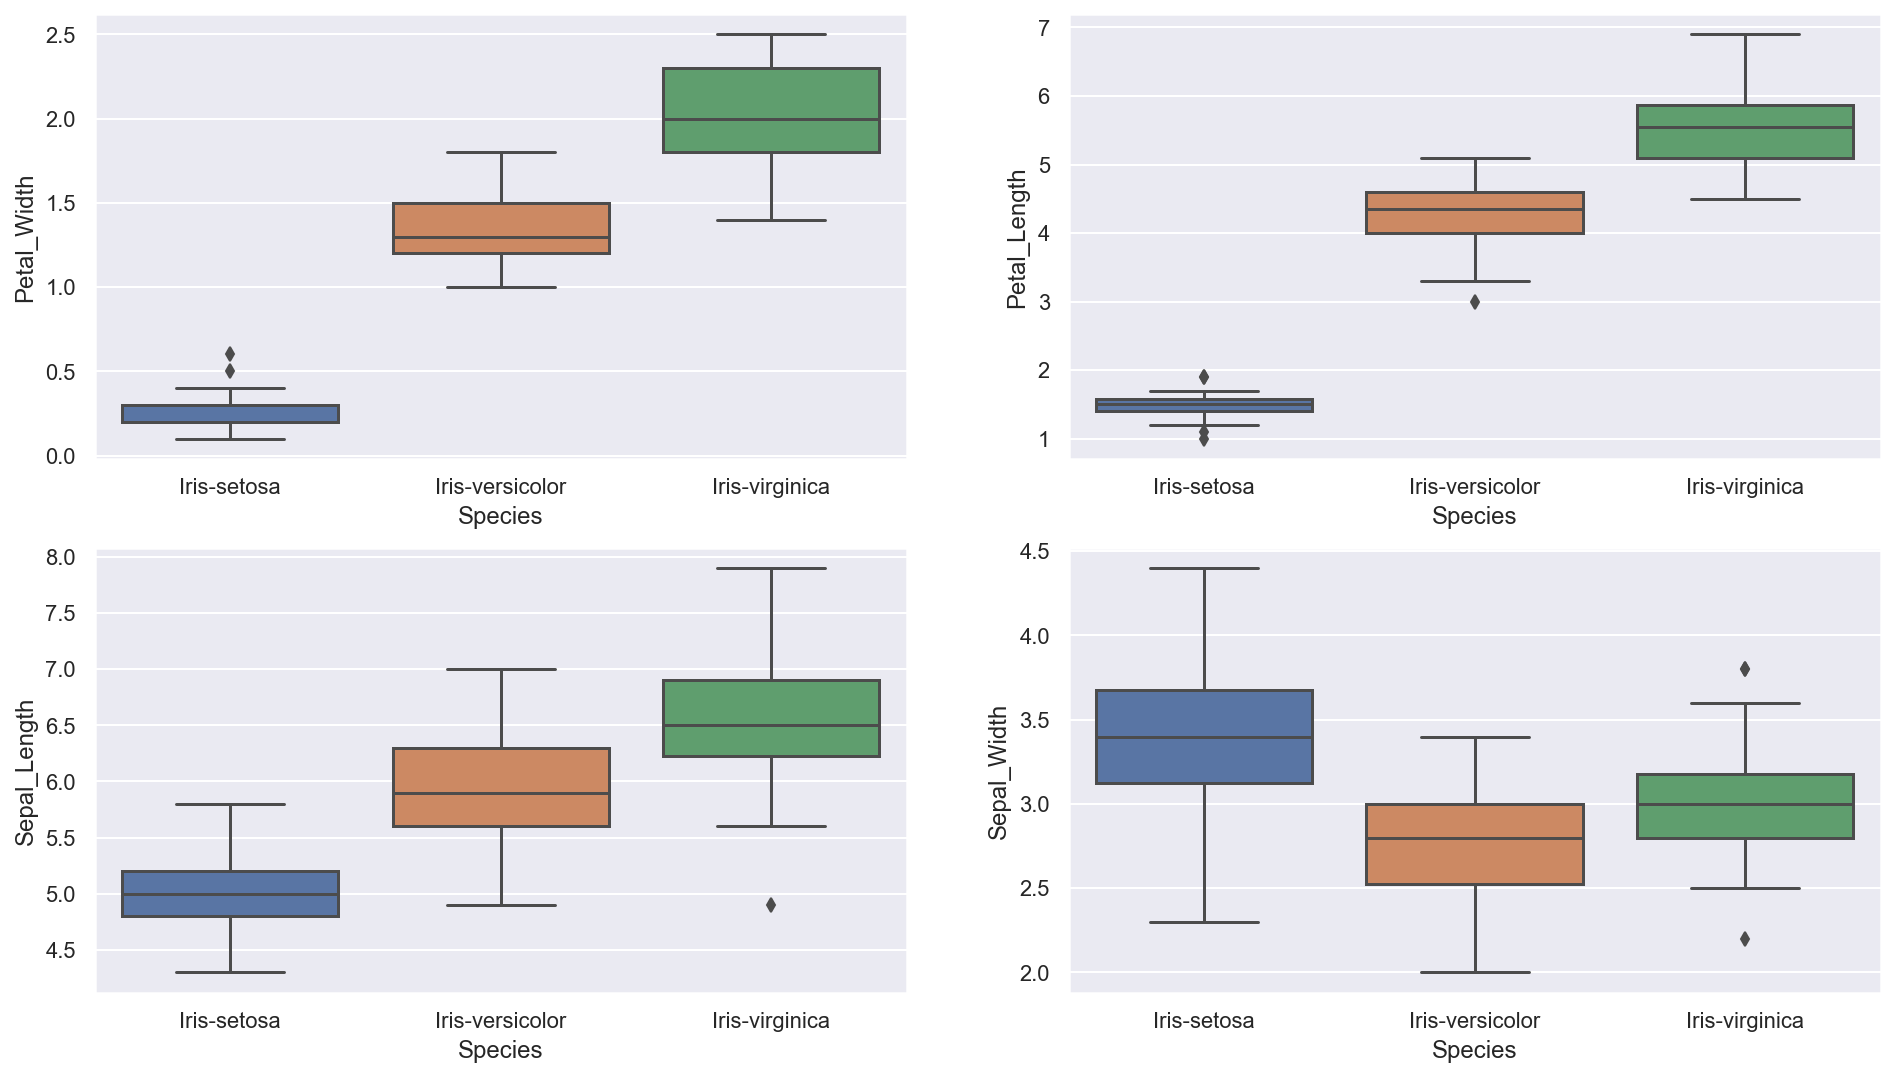

In [15]:
#to check the distribution of each specie

fig, axes = plt.subplots(2,2, figsize=(16,9))

sns.boxplot(x='Species', y='Petal_Width', data=iris_df, orient='v', ax=axes[0,0])
sns.boxplot(x='Species', y='Petal_Length', data=iris_df, orient='v', ax=axes[0,1])
sns.boxplot(x='Species', y='Sepal_Length', data=iris_df, orient='v', ax=axes[1,0])
sns.boxplot(x='Species', y='Sepal_Width', data=iris_df, orient='v', ax=axes[1,1])

From the plot above, we can say;
1. Setosa species have smaller features(dimensions) and are less distributed
2. Versicolor species are distributed in an average manner and average features(dimensions).
3. Virginica species are highly distributed with large number of values and features(dimensions).